### Load dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_name = 'Car Ownership.csv'
df = pd.read_csv(df_name)

In [3]:
df.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2


### Data normalization

In [4]:
# change column names to lower case and remove spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['occupation', 'monthly_income', 'credit_score', 'years_of_employment',
       'finance_status', 'finance_history', 'car', 'number_of_children'],
      dtype='object')

In [5]:
# there are rows with NaN only values. remove them
df[df.occupation.isna()]

,occupation,monthly_income,credit_score,years_of_employment,finance_status,finance_history,car,number_of_children
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df[df.occupation.isna()!=True]

In [7]:
# remove rows with car = NaN
df[df.car.isna()]

,occupation,monthly_income,credit_score,years_of_employment,finance_status,finance_history,car,number_of_children
29,Musician,2500,550.0,NaN,NaN,NaN,NaN,NaN
92,Dental Hygienist,"$5,000",NaN,NaN,NaN,NaN,NaN,NaN
155,Librarian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Mechanical Engineer,$8,NaN,NaN,NaN,NaN,NaN,NaN
259,Carpenter,"$3,200",NaN,NaN,NaN,NaN,NaN,NaN
362,Architect,"$6,100",718.0,5 years,Stable,No significant issues,NaN,0
364,IT Manager,"$8,400",NaN,7 years,Stable,No significant issues,NaN,2
367,Sales Representative,"$3,100",598.0,2 years,Unstable,"Late payments, collections",NaN,0
434,Copywriter,$,NaN,NaN,NaN,NaN,NaN,NaN
477,Writer,"$3,500",650.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df[df.car.isna()!=True]

In [9]:
# most of the types is object. Let's convert some of them to numeric types
df.dtypes

occupation              object
monthly_income          object
credit_score           float64
years_of_employment     object
finance_status          object
finance_history         object
car                     object
number_of_children      object
dtype: object

In [10]:
# number_of_children can be int
df.number_of_children = df.number_of_children.str.replace('na', '0').fillna(0).astype(int)

In [11]:
# monthly_income should be int
# first normalize its values
df.monthly_income = df.monthly_income.str.lower().str.replace('$','').str.replace(',','').str.replace('.', '').str.replace(' ', '').str.replace('usd','').str.replace('k', '000')
# then find mean value and use it for na
mean_monthly_income = df.monthly_income[df.monthly_income.isna() != True].astype(int).mean()
df.monthly_income = df.monthly_income.fillna(mean_monthly_income)
df.monthly_income = df.monthly_income.astype(int)

In [12]:
# for occupation just convert to lower and replace space with underscore
df.occupation = df.occupation.str.lower().str.replace(' ', '_')

In [13]:
# years of employment should be int.
# first replace na with 0
df.years_of_employment = df.years_of_employment.fillna(0)

In [14]:
# there are rows with 'years' or 'year'. Let's remove these words using the next cell
df.years_of_employment

0           10
1            8
2            5
3           12
4           15
        ...   
495    5 years
496    4 years
497    4 years
498    3 years
499    4 years
Name: years_of_employment, Length: 480, dtype: object

In [15]:
df.years_of_employment = df.years_of_employment.apply(lambda x: str(x).strip().partition(' ')[0]).str.replace('nan', '0').fillna(0).astype(int)

In [47]:
# finance status
df.finance_status = df.finance_status.str.lower()
df.finance_status = df.finance_status.str.replace('unknow', 'unknown')
df.finance_status = df.finance_status.str.replace('unkonw', 'unknown')
df.finance_status = df.finance_status.str.replace('unkown', 'unknown')
df.finance_status = df.finance_status.str.replace('unstable', 'poor')
df.finance_status = df.finance_status.str.replace('stable', 'good')
df.finance_status = df.finance_status.fillna('unknown')

In [17]:
# finance_history - lower the values and replaces space with underscore
df.finance_history = df.finance_history.str.lower().str.replace(' ','_').str.replace(',','_').str.replace('__','_')

# fill na with the default value
df.finance_history = df.finance_history.fillna('no_issues')

# merge some values
df.finance_history = df.finance_history.str.replace('no_significant_issues', 'no_significant_issue')
df.finance_history = df.finance_history.str.replace('late_payments', 'late_payment')

In [18]:
# the car column is converted to int
df.car = df.car.str.lower()
df.car = (df.car=='yes').astype(int)

In [19]:
# creadit score
df.credit_score = df.credit_score.fillna(0)

In [20]:
# the normalized data set
df.head()

,occupation,monthly_income,credit_score,years_of_employment,finance_status,finance_history,car,number_of_children
0,teacher,40000,750.0,10,good,no_issues,1,2
1,engineer,60000,800.0,8,good,no_issues,1,1
2,nurse,25000,650.0,5,fair,late_payment_2_months_ago,0,0
3,doctor,80000,900.0,12,excellent,no_issues,1,3
4,businessman,100000,700.0,15,good,late_payment_6_months_ago,1,2


In [21]:
# the new types of the dataset's columns
df.dtypes

occupation              object
monthly_income           int64
credit_score           float64
years_of_employment      int64
finance_status          object
finance_history         object
car                      int64
number_of_children       int64
dtype: object

### Categorical values

In [147]:
list(df.occupation.value_counts().index)

['chef',
 'electrician',
 'graphic_designer',
 'nurse',
 'architect',
 'accountant',
 'insurance_agent',
 'physical_therapist',
 'teacher',
 'engineer',
 'sales_manager',
 'real_estate_agent',
 'sales_representative',
 'veterinarian',
 'web_developer',
 'web_designer',
 'dental_hygienist',
 'marketing_manager',
 'writer',
 'financial_analyst',
 'data_scientist',
 'software_engineer',
 'customer_service_rep',
 'financial_advisor',
 'lawyer',
 'doctor',
 'plumber',
 'musician',
 'social_worker',
 'personal_trainer',
 'it_manager',
 'human_resources_manager',
 'marketing_coordinator',
 'human_resources',
 'construction_worker',
 'salesperson',
 'software_developer',
 'retail_manager',
 'businessman',
 'medical_assistant',
 'mechanical_engineer',
 'project_manager',
 'customer_service',
 'pharmacist',
 'account_executive',
 'event_planner',
 'bank_teller',
 'physical_education_teacher',
 'hr_generalist',
 'executive_assistant',
 'attorney',
 'interior_designer',
 'mechanical_technician',
 

In [149]:
list(df.finance_status.value_counts().index)

['good', 'poor', 'fair', 'excellent', 'unknownn']

In [150]:
list(df.finance_history.value_counts().index)

['no_significant_issue',
 'missed_payments_in_the_past',
 'late_payment',
 'no_issues',
 'late_payment_collections',
 'poor',
 'excellent',
 'good',
 'fair',
 'late_payment_2_months_ago',
 'late_payment_6_months_ago',
 'late_payment_3_months_ago',
 'late_payment_1_month_ago',
 'missed_payments_collections_charge-offs']

### DSA

#### Compute pairwise correlation of columns

In [22]:
numeric = ['monthly_income','credit_score','years_of_employment','number_of_children']
categorical = ['occupation','finance_status','finance_history']
data_numeric = df.copy()
data_numeric = data_numeric.drop(categorical, axis=1)
data_numeric = data_numeric.drop(['car'], axis=1)
data_numeric.describe()


,monthly_income,credit_score,years_of_employment,number_of_children
count,480.00000,480.000000,480.000000,480.000000
mean,8401.89375,668.437500,4.264583,0.745833
std,14659.16393,167.570109,2.799268,0.912671
min,7.00000,0.000000,0.000000,0.000000
25%,3500.00000,650.000000,2.000000,0.000000
50%,4800.00000,690.000000,4.000000,0.000000
75%,7275.00000,750.000000,6.000000,1.000000
max,120000.00000,900.000000,20.000000,4.000000


In [23]:
data_numeric.corr()

,monthly_income,credit_score,years_of_employment,number_of_children
monthly_income,1.000000,0.128814,0.581407,0.133607
credit_score,0.128814,1.000000,0.394850,0.003855
years_of_employment,0.581407,0.394850,1.000000,0.126888
number_of_children,0.133607,0.003855,0.126888,1.000000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

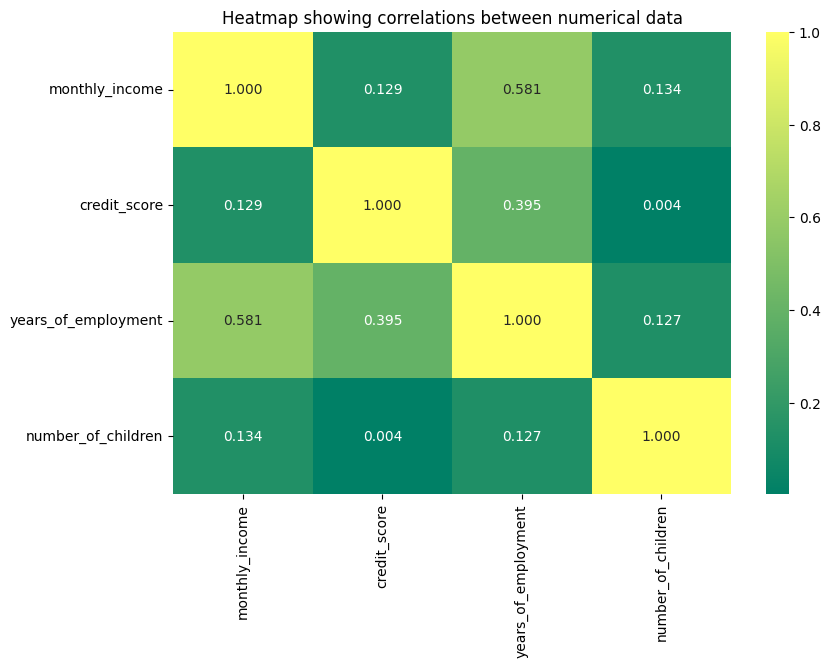

In [25]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [26]:
data_numeric.corr().unstack().sort_values(ascending = False)

monthly_income       monthly_income         1.000000
credit_score         credit_score           1.000000
years_of_employment  years_of_employment    1.000000
number_of_children   number_of_children     1.000000
monthly_income       years_of_employment    0.581407
years_of_employment  monthly_income         0.581407
credit_score         years_of_employment    0.394850
years_of_employment  credit_score           0.394850
monthly_income       number_of_children     0.133607
number_of_children   monthly_income         0.133607
monthly_income       credit_score           0.128814
credit_score         monthly_income         0.128814
years_of_employment  number_of_children     0.126888
number_of_children   years_of_employment    0.126888
credit_score         number_of_children     0.003855
number_of_children   credit_score           0.003855
dtype: float64

We can see that `monthly_income` and `years_of_employment` have the highest correlation

### Split data

In [49]:
SEED = 11

In [50]:
data_class = df.copy()

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(data_class) == (len(df_train) + len(df_val) + len(df_test))

In [53]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [54]:
y_train = df_train.car.values
y_val = df_val.car.values
y_test = df_test.car.values

In [55]:
del df_train['car']
del df_val['car']
del df_test['car']

### Mutual info

In [56]:
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error

In [57]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

In [58]:
df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
occupation,0.475700
finance_history,0.332326
finance_status,0.262246


### Logistic regression

In [59]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [60]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [61]:
lr = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)
lr.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=11, solver='liblinear')

In [62]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = lr.predict_proba(X_val)[:, 1]

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

In [64]:
logistic_regression_auc = roc_auc_score(y_val, y_pred)
logistic_regression_auc

0.9265217391304349

In [65]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

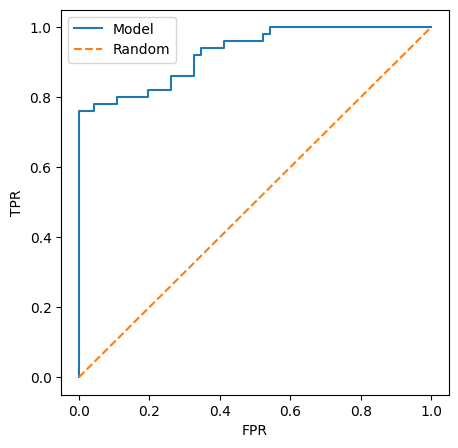

In [66]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

### Cross validation

In [67]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv_ = DictVectorizer(sparse=False)
    X_train_ = dv_.fit_transform(dicts)

    model_ = LogisticRegression(C=C, max_iter=1000)
    model_.fit(X_train_, y_train)
    
    return dv_, model_

In [68]:
def predict(df, dv, model_):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred_ = model_.predict_proba(X)[:, 1]

    return y_pred_

In [69]:
from sklearn.model_selection import KFold

In [70]:
from tqdm.auto import tqdm

In [71]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_ = df_full_train.iloc[train_idx]
        df_val_ = df_full_train.iloc[val_idx]

        y_train_ = df_train_.car.values
        y_val_ = df_val_.car.values
        del df_train_['car']
        del df_val_['car']
        dv_, model_ = train(df_train_, y_train_, C=C)
        y_pred_ = predict(df_val_, dv_, model_)

        auc_ = roc_auc_score(y_val_, y_pred_)
        scores.append(auc_)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.869 +- 0.059
C=0.01 0.897 +- 0.033
C=0.1 0.932 +- 0.031
C=0.5 0.942 +- 0.024
C=1 0.949 +- 0.013
C=5 0.943 +- 0.031
C=10 0.948 +- 0.014


In [72]:
dv_, model = train(df_full_train, df_full_train.car.values, C=1.0)
y_pred = predict(df_test, dv_, model)

logistic_regression_auc = roc_auc_score(y_test, y_pred)
logistic_regression_auc

0.9472222222222223

### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [75]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.808695652173913

In [76]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth, random_state=SEED)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.763
   2 -> 0.838
   3 -> 0.771
   4 -> 0.753
   5 -> 0.752
   6 -> 0.753
  10 -> 0.765
  15 -> 0.809
  20 -> 0.809
None -> 0.809


In [77]:
scores = []

for depth in [2, 3, 15]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, random_state=SEED)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [78]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [79]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth            2      3      15
min_samples_leaf                     
1                 0.838  0.771  0.809
5                 0.838  0.863  0.893
10                0.838  0.902  0.909
15                0.838  0.896  0.906
20                0.838  0.898  0.920
100               0.800  0.800  0.800
200               0.500  0.500  0.500
500               0.500  0.500  0.500

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

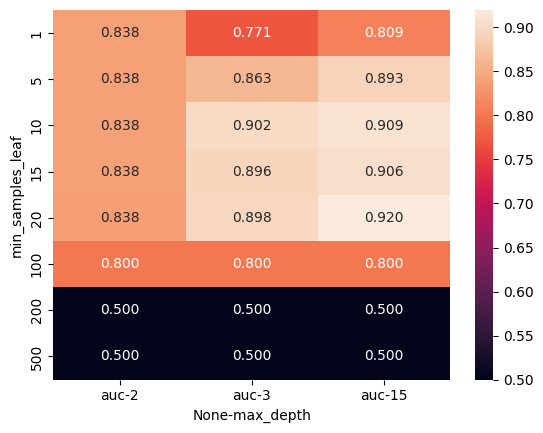

In [80]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [81]:
dt = DecisionTreeClassifier(max_depth=15, min_samples_leaf=20, random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=20, random_state=11)

In [82]:
from sklearn.tree import export_text

In [83]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- monthly_income <= 3750.00
|   |--- finance_status=poor <= 0.50
|   |   |--- class: 0
|   |--- finance_status=poor >  0.50
|   |   |--- credit_score <= 625.00
|   |   |   |--- class: 0
|   |   |--- credit_score >  625.00
|   |   |   |--- class: 0
|--- monthly_income >  3750.00
|   |--- credit_score <= 665.00
|   |   |--- class: 0
|   |--- credit_score >  665.00
|   |   |--- monthly_income <= 5300.00
|   |   |   |--- monthly_income <= 4250.00
|   |   |   |   |--- class: 1
|   |   |   |--- monthly_income >  4250.00
|   |   |   |   |--- class: 1
|   |   |--- monthly_income >  5300.00
|   |   |   |--- finance_history=no_significant_issue <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- finance_history=no_significant_issue >  0.50
|   |   |   |   |--- class: 1



In [84]:
y_pred = dt.predict_proba(X_val)[:, 1]
decision_tree_auc = roc_auc_score(y_val, y_pred)

print('%.3f' % decision_tree_auc)

0.920


### RandomForest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
SEED = 1

In [87]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=SEED)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [88]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

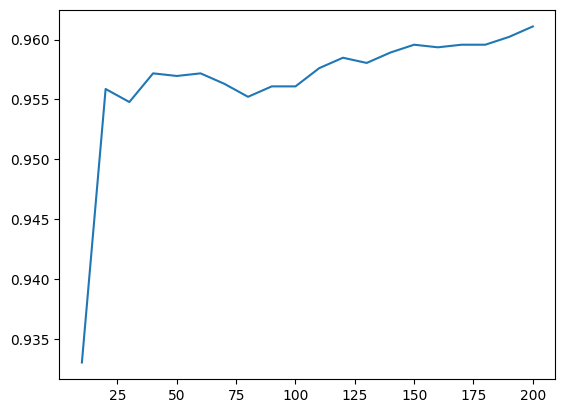

In [89]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [90]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=SEED)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [91]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

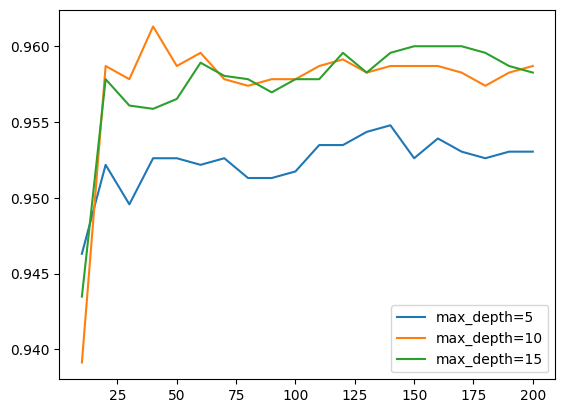

In [92]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [93]:
max_depth = 10

In [94]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=SEED)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [95]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

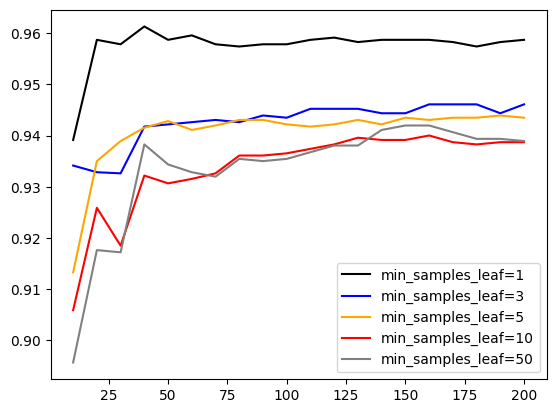

In [96]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [97]:
min_samples_leaf = 1

In [98]:
df_scores.sort_values(ascending=False, by='auc')

,min_samples_leaf,n_estimators,auc
3,1,40,0.961304
5,1,60,0.959565
11,1,120,0.959130
13,1,140,0.958696
1,1,20,0.958696
...,...,...,...
81,50,20,0.917609
82,50,30,0.917174
40,5,10,0.913261
60,10,10,0.905870


In [99]:
rf = RandomForestClassifier(n_estimators=40,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=SEED)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=40, random_state=1)

In [100]:
y_pred = rf.predict_proba(X_val)[:, 1]
random_forest_auc = roc_auc_score(y_val, y_pred)

print('%.3f' % random_forest_auc)

0.961


### xgboost

In [101]:
import xgboost as xgb

In [102]:
features = dv.feature_names_
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [103]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [104]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9260869565217391

In [105]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [106]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [107]:
s = output.stdout

In [108]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [109]:
df_score = parse_xgb_output(output)

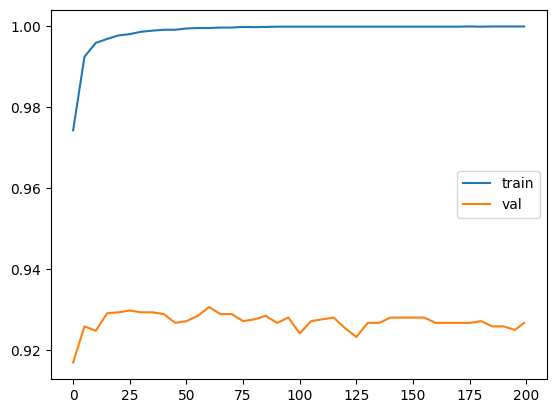

In [110]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

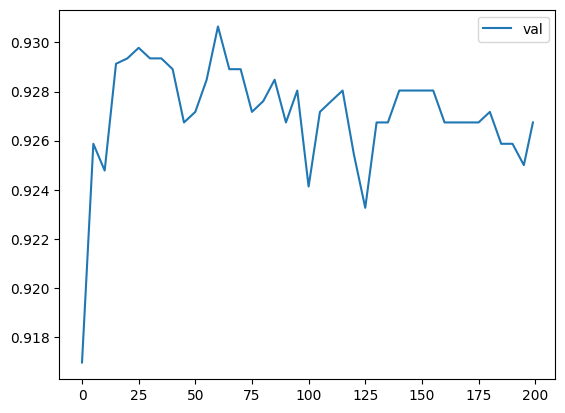

In [111]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [112]:
scores = {}

In [113]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [114]:
scores = {}

In [115]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [116]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [117]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

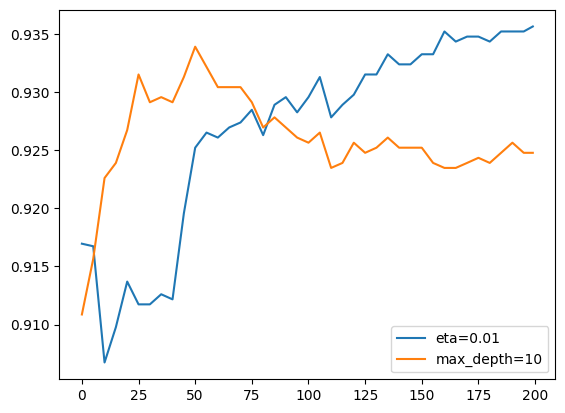

In [118]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

#plt.ylim(0.8, 0.84)
plt.legend()

In [119]:
scores = {}

In [120]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=50,
                  verbose_eval=5,
                  evals=watchlist)

In [121]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

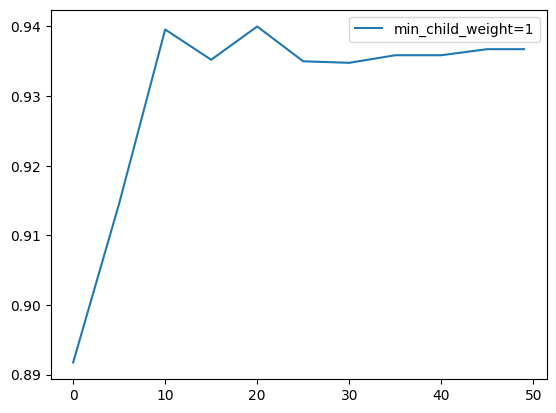

In [122]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

#plt.ylim(0.82, 0.84)
plt.legend()

In [123]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=50)

In [124]:
y_pred = model.predict(dval)
xgboost_auc = roc_auc_score(y_val, y_pred)
xgboost_auc

0.9367391304347826

### Selecting the final model

In [125]:
logistic_regression_auc

0.9472222222222223

In [126]:
decision_tree_auc

0.9197826086956522

In [127]:
random_forest_auc

0.961304347826087

In [128]:
xgboost_auc

0.9367391304347826

The final model is random forest

### Save the model

In [129]:
import joblib

In [130]:
joblib.dump(rf, 'model.bin')
joblib.dump(dv, 'dv.bin')

['dv.bin']

In [131]:
model1 = joblib.load('model.bin')
dv1 = joblib.load('dv.bin')

In [132]:
customer = df_test.iloc[0].to_dict()
customer

{'occupation': 'engineer',
 'monthly_income': 60000,
 'credit_score': 800.0,
 'years_of_employment': 8,
 'finance_status': 'good',
 'finance_history': 'no_issues',
 'number_of_children': 1}

In [133]:
customer['monthly_income'] = 4500
customer['years_of_employment'] = 5
customer['credit_score'] = 250
customer

{'occupation': 'engineer',
 'monthly_income': 4500,
 'credit_score': 250,
 'years_of_employment': 5,
 'finance_status': 'good',
 'finance_history': 'no_issues',
 'number_of_children': 1}

In [134]:
X = dv1.transform([customer])

In [135]:
Y = model1.predict_proba(X)[0,1]
Y

0.7881108149466189

In [136]:
int(Y >= 0.5)

1